<a href="https://colab.research.google.com/github/pavi2006thara/Pavi-naan-muthalvan-/blob/main/Phase2_NM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from google.colab import files
uploaded = files.upload()

Saving assessments.csv to assessments.csv


In [ ]:
import pandas as pd

df = pd.read_csv("assessments.csv")
print(df.head())

  code_module code_presentation  id_assessment assessment_type   date  weight
0         AAA             2013J           1752             TMA   19.0    10.0
1         AAA             2013J           1753             TMA   54.0    20.0
2         AAA             2013J           1754             TMA  117.0    20.0
3         AAA             2013J           1755             TMA  166.0    20.0
4         AAA             2013J           1756             TMA  215.0    30.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_presentation  206 non-null    object 
 2   id_assessment      206 non-null    int64  
 3   assessment_type    206 non-null    object 
 4   date               195 non-null    float64
 5   weight             206 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.8+ KB
None
       id_assessment        date      weight
count     206.000000  195.000000  206.000000
mean    26473.975728  145.005128   20.873786
std     10098.625521   76.001119   30.384224
min      1752.000000   12.000000    0.000000
25%     15023.250000   71.000000    0.000000
50%     25364.500000  152.000000   12.500000
75%     34891.750000  222.000000   24.250000
max     40088.000000  261.000000  100.000000
code_module           0
code_presentatio

<ipython-input-6-fa12f6e7cb28>:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
<ipython-input-6-fa12f6e7cb28>:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

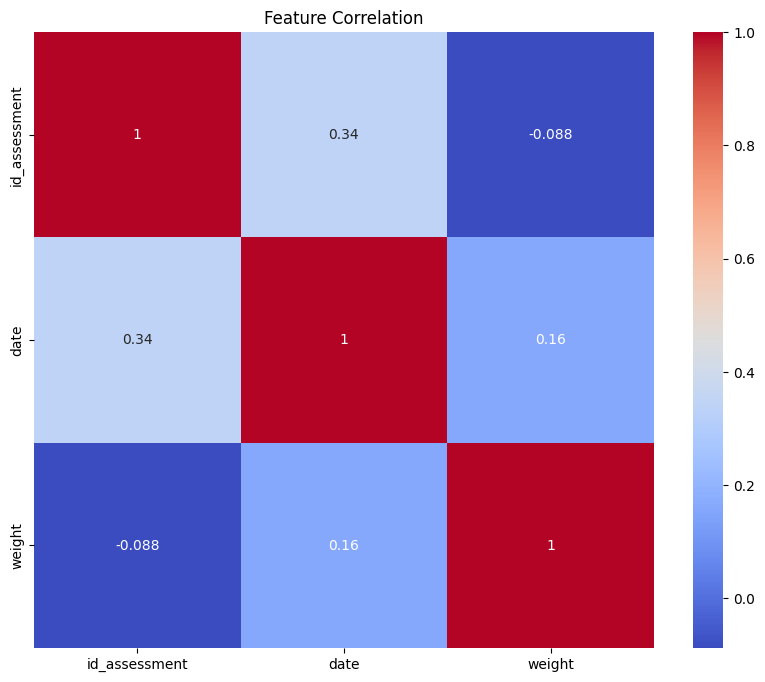

['rf_model.pkl']

In [6]:

# ===============================
# Step 1: Import Libraries
# ===============================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# ===============================
# Step 2: Load the Dataset
# ===============================
df = pd.read_csv("assessments.csv")

# ===============================
# Step 3: Data Cleaning
# ===============================
# Show basic info
print(df.info())
print(df.describe())
print(df.isnull().sum())

# Drop rows with too many missing values (optional threshold)
df = df.dropna(thresh=int(df.shape[1] * 0.6))

# Fill missing numeric values with median
for col in df.select_dtypes(include=np.number).columns:
    df[col].fillna(df[col].median(), inplace=True)

# Fill missing categorical values with mode
for col in df.select_dtypes(include='object').columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# ===============================
# Step 4: Exploratory Data Analysis (EDA)
# ===============================
# Visualize target distribution (adjust target column name)
if 'target' in df.columns:
    sns.countplot(x='target', data=df)
    plt.title('Target Variable Distribution')
    plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

# Pair plot (optional, slow for large data)
# sns.pairplot(df.select_dtypes(include=np.number))

# ===============================
# Step 5: Feature Engineering
# ===============================
# Encode categorical columns
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

# Feature-target split (adjust target column name)
X = df.drop(columns=['target']) if 'target' in df.columns else df.iloc[:, :-1]
y = df['target'] if 'target' in df.columns else df.iloc[:, -1]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

import joblib
joblib.dump(model, 'rf_model.pkl')

In [4]:
# ===============================
# Step 6: Model Engineering
# ===============================
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Convert target variable to discrete if necessary
# Check if y contains continuous values
if pd.api.types.is_numeric_dtype(y):
    # If continuous, convert to discrete using a suitable method
    # For example, you can use binning or thresholding
    # Here, we'll use a simple threshold to create two classes
    y_train = (y_train > y_train.mean()).astype(int)
    y_test = (y_test > y_test.mean()).astype(int)

# Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ===============================
# Step 7: Save Model (Optional)
# ===============================
import joblib
joblib.dump(model, 'rf_model.pkl')

Confusion Matrix:
 [[30  0]
 [ 0 12]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        12

    accuracy                           1.00        42
   macro avg       1.00      1.00      1.00        42
weighted avg       1.00      1.00      1.00        42



['rf_model.pkl']